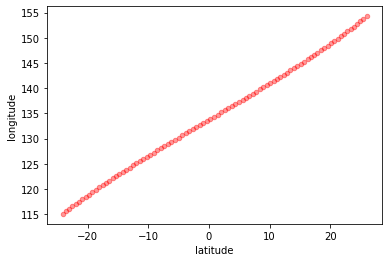

In [5]:
import requests
import time
import json
from datetime import datetime, timedelta
import csv 
import matplotlib.pyplot as plt
import pandas as pd

location_iss = []
headers = requests.utils.default_headers()
start_time = datetime.now()
end_time = start_time + timedelta(minutes=17)

while(end_time > datetime.now()):
    request = requests.get(url='http://api.open-notify.org/iss-now.json', headers=headers)
    inp = request.json() 
    location_iss.append(inp)
    time.sleep(10)

with open('location_iss.json', 'w') as f:
    json.dump(location_iss,f)
    


with open('location_iss.json', 'r') as file:
    data = json.load(file)
    csvfile = open('location_iss.csv', 'w', newline = '')
    with csvfile:
        header = ['latitude', 'longitude']
        writer = csv.DictWriter(csvfile,fieldnames = header)
        writer.writeheader()
        for item in data:
            writer.writerow(item['iss_position'])
            
csvdf = pd.DataFrame(pd.read_csv('location_iss.csv'))
      

csvdf.plot(kind = "scatter", x="latitude", y="longitude", alpha=0.4, color ="red")
plt.show()